In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from abc import ABC,abstractmethod
from typing import Dict, Any
from scipy import stats
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("HomeC.csv")
df.head()

C:\Users\gedee\AppData\Local\Temp\ipykernel_70556\283611775.py:1: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("HomeC.csv")


,time,use [kW],gen [kW],House overall [kW],Dishwasher [kW],Furnace 1 [kW],Furnace 2 [kW],Home office [kW],Fridge [kW],Wine cellar [kW],...,visibility,summary,apparentTemperature,pressure,windSpeed,cloudCover,windBearing,precipIntensity,dewPoint,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
1,1451624401,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
2,1451624402,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
3,1451624403,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0
4,1451624404,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,...,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [3]:
df.summary.value_counts()

Clear                       376730
Partly Cloudy                62268
Light Rain                   27368
Drizzle                      10370
Overcast                      6041
Rain                          5169
Mostly Cloudy                 4548
Light Snow                    4323
Flurries                      1789
Breezy                        1561
Snow                          1152
Breezy and Partly Cloudy      1041
Foggy                          974
Rain and Breezy                174
Heavy Snow                     171
Flurries and Breezy            115
Breezy and Mostly Cloudy        58
Dry                             58
Name: summary, dtype: int64

In [4]:
df.isna().sum()

time                   0
use [kW]               1
gen [kW]               1
House overall [kW]     1
Dishwasher [kW]        1
Furnace 1 [kW]         1
Furnace 2 [kW]         1
Home office [kW]       1
Fridge [kW]            1
Wine cellar [kW]       1
Garage door [kW]       1
Kitchen 12 [kW]        1
Kitchen 14 [kW]        1
Kitchen 38 [kW]        1
Barn [kW]              1
Well [kW]              1
Microwave [kW]         1
Living room [kW]       1
Solar [kW]             1
temperature            1
icon                   1
humidity               1
visibility             1
summary                1
apparentTemperature    1
pressure               1
windSpeed              1
cloudCover             1
windBearing            1
precipIntensity        1
dewPoint               1
precipProbability      1
dtype: int64

In [5]:
# This function is used to remove missing values (NaN values) from the DataFrame.
df.dropna(inplace=True)


In [6]:
def change_class(x):
    if 'Clear' in x:
        return 0
    if 'Cloudy' in x:
        return 1
    if "Breezy" in x:
        return 1
    else:
        return 2

df['summary'] = df['summary'].map(lambda x: change_class(x))

df = df[['temperature', 'windSpeed', 'humidity', 'summary']]

df.summary.value_counts()

df.drop_duplicates(inplace=True)

In [7]:
df

,temperature,windSpeed,humidity,summary
0,36.14,9.18,0.62,0
58,35.87,8.29,0.61,1
116,35.40,8.20,0.61,0
174,35.25,5.47,0.64,0
232,35.49,7.08,0.64,0
...,...,...,...,...
503627,36.63,10.97,0.72,2
503684,37.98,11.77,0.69,1
503741,36.73,12.40,0.79,2
503798,35.91,7.82,0.82,2


In [8]:
df = pd.concat([df[df.summary == 0][:100], df[df.summary==1][:100], df[df.summary==2][:100]])

In [9]:
df

,temperature,windSpeed,humidity,summary
0,36.14,9.18,0.62,0
116,35.40,8.20,0.61,0
174,35.25,5.47,0.64,0
232,35.49,7.08,0.64,0
290,35.26,6.45,0.65,0
...,...,...,...,...
63684,15.77,4.78,0.78,2
63742,16.17,5.55,0.80,2
63800,16.96,4.87,0.82,2
63858,17.56,6.74,0.83,2


In [10]:
X = df.drop('summary', axis=1)
y = df.summary

# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y,random_state=42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [11]:
class KNN(ABC):
    """
    Base class for KNN implementations
    """
    def __init__(self, K: int = 3, metric: str = 'minkowski', p: int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
        K -> integer specifying number of neighbours to consider
        metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
        p -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # check distance is a valid entry
        valid_distance = ['minkowski','cosine']
        if metric not in valid_distance:
            msg = "Entered value for metric is not valid. Pick one of {}".format(valid_distance)
            raise ValueError(msg)

        # check minkowski p parameter
        if (metric == 'minkowski') and (p <= 0):
            msg = "Entered value for p is not valid. For metric = 'minkowski', p >= 1"
            raise ValueError(msg)

        # store/initialise input parameters
        self.K = K
        self.metric = metric
        self.p = p
        self.X_train = np.array([])
        self.y_train = np.array([])

    def __del__(self) -> None:
        """
        Destructor function.
        """
        del self.K
        del self.metric
        del self.p
        del self.X_train
        del self.y_train

    def __minkowski(self, x: np.array) -> np.array:
        """
        Private function to compute the minkowski distance between point x and the training data X
        Inputs:
        x -> numpy data point of predictors to consider
        Outputs:
        np.array -> numpy array of the computed distances
        """
        return np.power(np.sum(np.power(np.abs(self.X_train - x),self.p),axis=1),1/self.p)

    def __cosine(self, x: np.array) -> np.array:
        """
        Private function to compute the cosine distance between point x and the training data X
        Inputs:
        x -> numpy data point of predictors to consider
        Outputs:
        np.array -> numpy array of the computed distances
        """
        return (1 - (np.dot(self.X_train,x)/(np.linalg.norm(x)*np.linalg.norm(self.X_train,axis=1))) )

    def __distances(self, X: np.array) -> np.array:
        """
        Private function to compute distances to each point x in X[x,:]
        Inputs:
        X -> numpy array of points [x]
        Outputs:
        D -> numpy array containing distances from x to all points in the training set.
        """
        # cover distance calculation
        if self.metric == 'minkowski':
            D = np.apply_along_axis(self.__minkowski,1,X)
        elif self.metric == 'cosine':
            D = np.apply_along_axis(self.__cosine,1,X)

        # return computed distances
        return D

    @abstractmethod
    def _generate_predictions(self, idx_neighbours: np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        """
        pass

    def fit(self, X: np.array, y: np.array) -> None:
        """
        Public training function for the class. It is assummed input X has been normalised.
        Inputs:
        X -> numpy array containing the predictor features
        y -> numpy array containing the labels associated with each value in X
        """
        # store training data
        self.X_train = np.copy(X)
        self.y_train = np.copy(y)

    def predict(self, X: np.array) -> np.array:
        """
        Public prediction function for the class.
        It is assummed input X has been normalised in the same fashion as the input to the training function
        Inputs:
        X -> numpy array containing the predictor features
        Outputs:
        y_pred -> numpy array containing the predicted labels
        """
        # ensure we have already trained the instance
        if (self.X_train.size == 0) or (self.y_train.size == 0):
            raise Exception('Model is not trained. Call fit before calling predict.')

        # compute distances
        D = self.__distances(X)

        # obtain indices for the K nearest neighbours
        idx_neighbours = D.argsort()[:,:self.K]

        # compute predictions
        y_pred = self._generate_predictions(idx_neighbours)

        # return results
        return y_pred

    def get_params(self, deep: bool = False) -> Dict:
        """
        Public function to return model parameters
        Inputs:
        deep -> boolean input parameter
        Outputs:
        Dict -> dictionary of stored class input parameters
        """
        return {'K':self.K,
                'metric':self.metric,
                'p':self.p}

#Generating kNN Classifier
class KNNClassifier(KNN):
    """
    Class for KNN classifiction implementation
    """
    def __init__(self, K: int = 3, metric: str = 'minkowski', p: int = 2) -> None:
        """
        Initializer function. Ensure that input parameters are compatiable.
        Inputs:
        K -> integer specifying number of neighbours to consider
        metric -> string to indicate the distance metric to use (valid entries are 'minkowski' or 'cosine')
        p -> order of the minkowski metric (valid only when distance == 'minkowski')
        """
        # call base class initialiser
        super().__init__(K,metric,p)

    def _generate_predictions(self, idx_neighbours: np.array) -> np.array:
        """
        Protected function to compute predictions from the K nearest neighbours
        Inputs:
        idx_neighbours -> indices of nearest neighbours
        Outputs:
        y_pred -> numpy array of prediction results
        """
        # compute the mode label for each submitted sample
        y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()

        # return result
        return y_pred

In [12]:
knn = KNNClassifier(K=3)
knn.fit(X, y)
y_pred = knn.predict(X)
y_pred

C:\Users\gedee\AppData\Local\Temp\ipykernel_70556\2852923928.py:158: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  y_pred = stats.mode(self.y_train[idx_neighbours],axis=1).mode.flatten()


array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2,
       2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 2], d

In [13]:
accuracy = sum(y==y_pred)/len(y)
accuracy

0.7866666666666666

NOW DECISION TREE CLASSIFIER!

In [15]:
import warnings

warnings.filterwarnings('ignore')

In [16]:
# view dimensions of dataset

df.shape

(300, 4)

In [17]:
# preview the dataset

df.head()

,temperature,windSpeed,humidity,summary
0,36.14,9.18,0.62,0
116,35.40,8.20,0.61,0
174,35.25,5.47,0.64,0
232,35.49,7.08,0.64,0
290,35.26,6.45,0.65,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 63916
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  300 non-null    float64
 1   windSpeed    300 non-null    float64
 2   humidity     300 non-null    float64
 3   summary      300 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 11.7 KB


In [26]:
    print(df.value_counts())   

temperature  windSpeed  humidity  summary
4.91         6.97       0.65      0          1
34.88        5.14       0.77      1          1
34.78        11.65      0.51      0          1
             9.11       0.60      0          1
34.77        5.74       0.91      2          1
                                            ..
25.20        1.81       0.74      1          1
25.07        13.22      0.78      1          1
24.96        11.99      0.61      0          1
24.91        0.89       0.90      2          1
56.36        10.76      0.87      2          1
Length: 300, dtype: int64


In [31]:
df['summary'].value_counts()

0    100
1    100
2    100
Name: summary, dtype: int64

In [32]:
df.isnull().sum()

temperature    0
windSpeed      0
humidity       0
summary        0
dtype: int64

In [34]:
X = df.drop(['summary'], axis=1)

y = df['summary']

In [35]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [36]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((201, 3), (99, 3))

In [37]:
# check data types in X_train

X_train.dtypes

temperature    float64
windSpeed      float64
humidity       float64
dtype: object

In [38]:
X_train.head()

,temperature,windSpeed,humidity
5278,11.71,12.40,0.52
21286,34.58,6.01,0.91
5394,9.39,13.79,0.56
2668,32.64,6.17,0.59
31378,26.27,15.93,0.58


In [40]:
# import category encoders

import category_encoders as ce

In [42]:
# encode variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['temperature', 'windSpeed', 'humidity', ])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [43]:
X_train.head()

,temperature,windSpeed,humidity
5278,1,1,1
21286,2,2,2
5394,3,3,3
2668,4,4,4
31378,5,5,5


In [44]:
X_test.head()

,temperature,windSpeed,humidity
11890,-1.0,-1.0,36.0
53650,-1.0,-1.0,14.0
19198,-1.0,-1.0,50.0
638,-1.0,-1.0,44.0
21634,-1.0,-1.0,13.0


Decision Tree Classifier with Criterion Gini Index

In [45]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [46]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [47]:
y_pred_gini = clf_gini.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4040


In [49]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0], dtype=int64)

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.4975


In [51]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.4975
Test set score: 0.4040


[Text(0.4090909090909091, 0.875, 'x[2] <= 2.5\ngini = 0.666\nsamples = 201\nvalue = [62, 68, 71]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 0, 8]'),
 Text(0.09090909090909091, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(0.6363636363636364, 0.625, 'x[0] <= 46.5\ngini = 0.666\nsamples = 192\nvalue = [61, 68, 63]'),
 Text(0.45454545454545453, 0.375, 'x[2] <= 13.5\ngini = 0.585\nsamples = 46\nvalue = [9, 26, 11]'),
 Text(0.36363636363636365, 0.125, 'gini = 0.665\nsamples = 19\nvalue = [6, 6, 7]'),
 Text(0.5454545454545454, 0.125, 'gini = 0.417\nsamples = 27\nvalue = [3, 20, 4]'),
 Text(0.8181818181818182, 0.375, 'x[2] <= 37.5\ngini = 0.664\nsamples = 146\nvalue = [52, 42, 52]'),
 Text(0.7272727272727273, 0.125, 'gini = 0.656\nsamples = 111\nvalue = [34, 31, 46]'),
 Text(0.9090909090909091, 0.125, 'gini = 0.607\nsamples = 35\nvalue = [18, 11, 6]')]

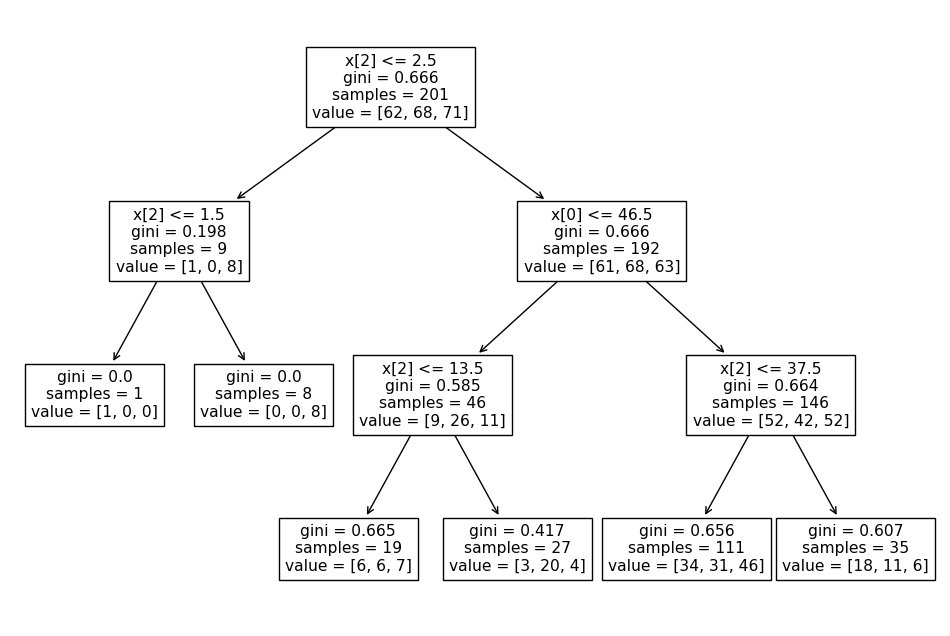

In [60]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [90]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

ModuleNotFoundError: No module named 'graphviz'

In [62]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [63]:
y_pred_en = clf_en.predict(X_test)

In [64]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.3838


Compare the train-set and test-set accuracy

In [65]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 2, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0], dtype=int64)

In [66]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.4925


In [67]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.4925
Test set score: 0.3838


[Text(0.4090909090909091, 0.875, 'x[2] <= 2.5\nentropy = 1.583\nsamples = 201\nvalue = [62, 68, 71]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 1.5\nentropy = 0.503\nsamples = 9\nvalue = [1, 0, 8]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 8\nvalue = [0, 0, 8]'),
 Text(0.6363636363636364, 0.625, 'x[1] <= 47.5\nentropy = 1.583\nsamples = 192\nvalue = [61, 68, 63]'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 4.5\nentropy = 1.42\nsamples = 47\nvalue = [8, 26, 13]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 1.362\nsamples = 45\nvalue = [6, 26, 13]'),
 Text(0.8181818181818182, 0.375, 'x[2] <= 37.5\nentropy = 1.578\nsamples = 145\nvalue = [53, 42, 50]'),
 Text(0.7272727272727273, 0.125, 'entropy = 1.569\nsamples = 110\nvalue = [35, 31, 44]'),
 Text(0.9090909090909091, 0.125, 'entropy = 1.454\nsamples =

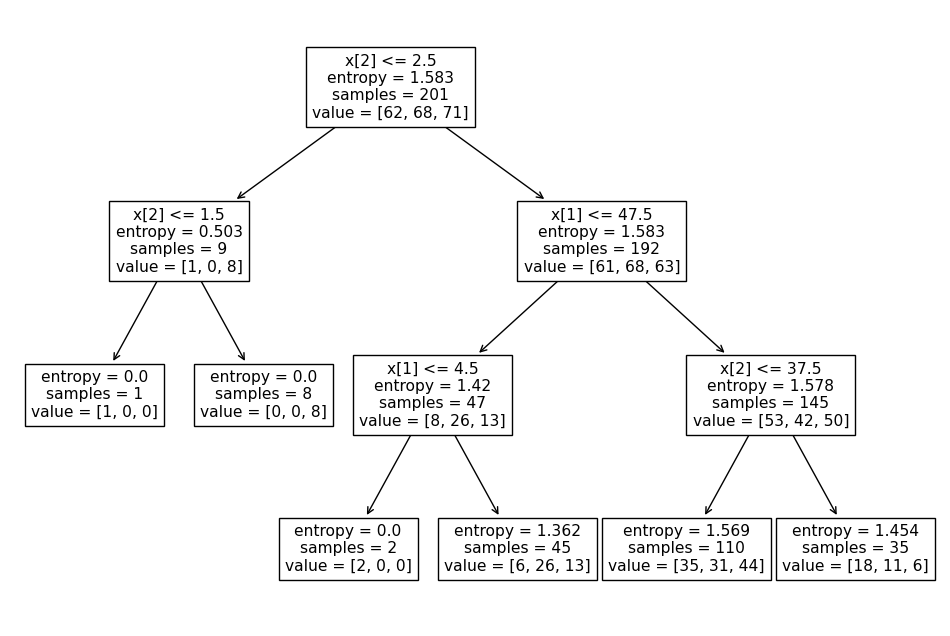

In [68]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 